In [16]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
columns_about_complexity = [
    "voc_simpson_index",
    "voc_shannon_entropy",
    "lex_avg_dependency_link_length",
    "voc_type_token_ratio",
    "voc_hapax_legomena",
]

In [18]:
papers_main_df = pd.read_csv("papers/cl_cv_papers_clean_similarities.csv")
reddit_main_df = pd.read_csv("reddit/reddit_clean_similarities.csv")
news_main_df = pd.read_csv("news/news_clean_similarities.csv")


papers_main_df = papers_main_df[papers_main_df["year"] >= 2018]
reddit_main_df = reddit_main_df[reddit_main_df["year"] >= 2018]
news_main_df = news_main_df[news_main_df["year"] >= 2018]

In [19]:
papers_threshold = 0.82
papers_ai_detection_df = pd.read_csv("papers/cl_cv_papers_ai_written.csv")

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"] < papers_threshold
)

papers_ai_detection_df = papers_ai_detection_df[papers_ai_detection_df["year"] >= 2018]
papers_ai_detection_df = (
    papers_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

papers_ai_detection_df["date"] = pd.to_datetime(
    papers_ai_detection_df["year"].astype(str)
    + "-"
    + papers_ai_detection_df["month"].astype(str)
)

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        papers_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Papers with threshold {papers_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

In [20]:
news_threshold = 0.83
news_ai_detection_df = pd.read_csv("news/news_ai_written.csv")

news_ai_detection_df["ai_written"] = news_ai_detection_df["ai_written"] < news_threshold

news_ai_detection_df = news_ai_detection_df[news_ai_detection_df["year"] >= 2018]
news_ai_detection_df = (
    news_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

news_ai_detection_df["date"] = pd.to_datetime(
    news_ai_detection_df["year"].astype(str)
    + "-"
    + news_ai_detection_df["month"].astype(str)
)

news_ai_detection_df["ai_written"] = (
    news_ai_detection_df["ai_written"].rolling(window=5).mean()
)


fig_px = (
    px.line(
        news_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in News with threshold {news_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

In [21]:
reddit_threshold = 0.87
reddit_ai_detection_df = pd.read_csv("reddit/reddit_ai_written.csv")

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"] < reddit_threshold
)

reddit_ai_detection_df = reddit_ai_detection_df[reddit_ai_detection_df["year"] >= 2018]
reddit_ai_detection_df = (
    reddit_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

reddit_ai_detection_df["date"] = pd.to_datetime(
    reddit_ai_detection_df["year"].astype(str)
    + "-"
    + reddit_ai_detection_df["month"].astype(str)
)

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        reddit_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Reddit with threshold {reddit_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)

fig_px.show()

In [22]:
papers_merged_df = pd.merge(
    papers_main_df,
    papers_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)


news_merged_df = pd.merge(
    news_main_df,
    news_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)


reddit_merged_df = pd.merge(
    reddit_main_df,
    reddit_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

In [23]:
feature_to_look_at = "mean"

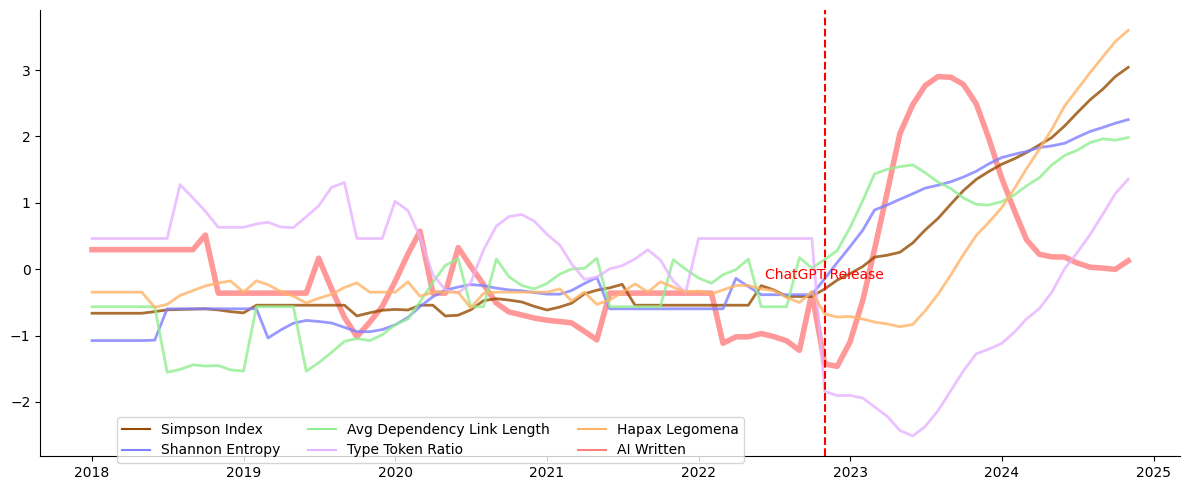

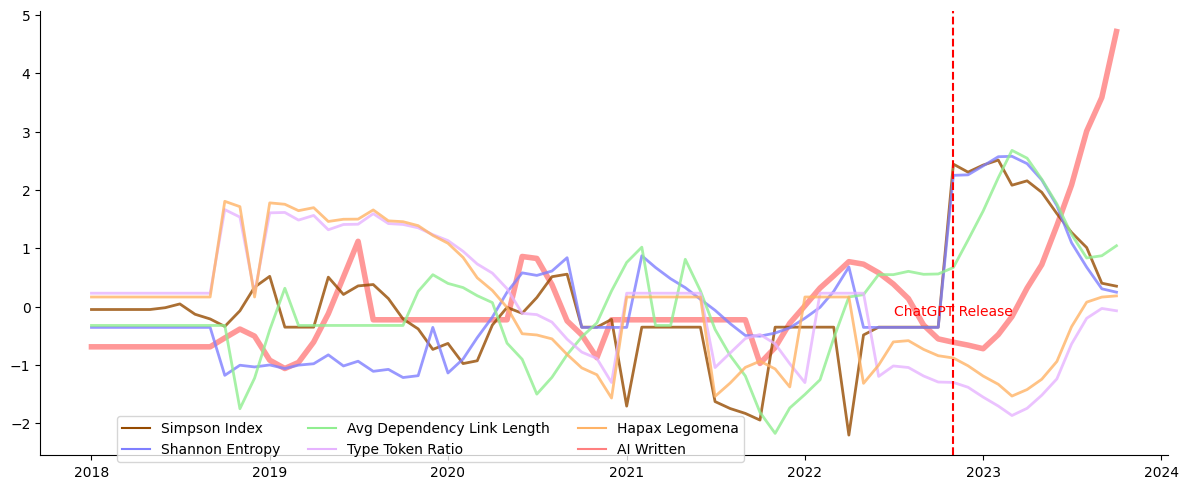

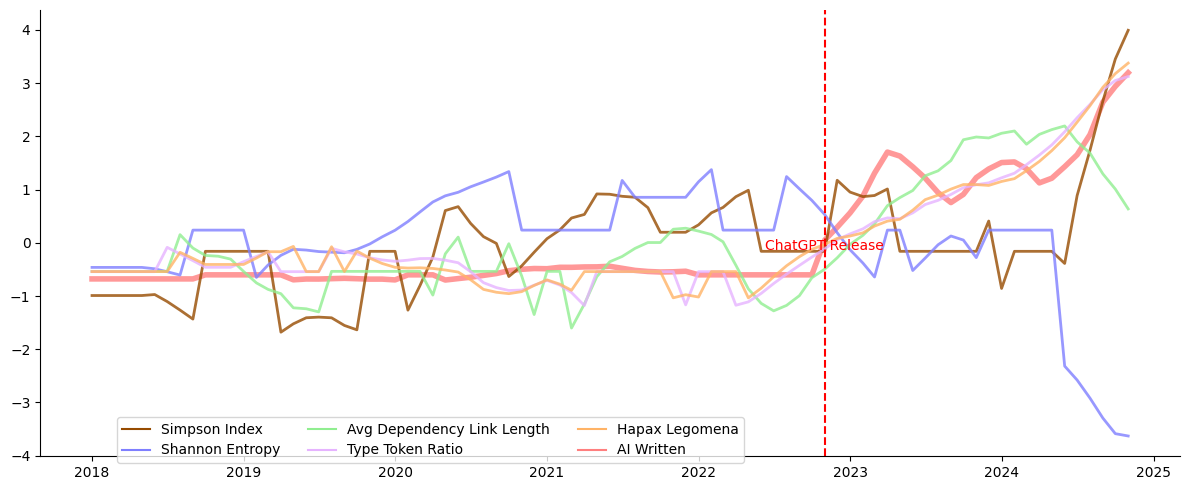

In [ ]:
from sklearn.preprocessing import StandardScaler

complexity_features_to_colors = {
    "voc_simpson_index": "#964B00",  # light yellow
    "voc_shannon_entropy": "#7f7fff",  # light blue
    "lex_avg_dependency_link_length": "#90EE90",  # light green
    "voc_type_token_ratio": "#E6B3FF",  # light purple
    "voc_hapax_legomena": "#FFB366",  # light orange
    "ai_written": "#ff7f7f",  # light salmon
}

feature_name_to_clean_label = {
    "voc_simpson_index": "Simpson Index",
    "voc_shannon_entropy": "Shannon Entropy",
    "lex_avg_dependency_link_length": "Avg Dependency Link Length",
    "voc_type_token_ratio": "Type Token Ratio",
    "voc_hapax_legomena": "Hapax Legomena",
    "ai_written": "AI Written",
}

for main_df, fig_title in zip(
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["Papers", "News", "Reddit"],
):

    main_df = main_df.copy()

    fig = plt.figure(figsize=(12, 5))

    normalized_values_dict = {}
    for feature in ["ai_written", *columns_about_complexity]:
        feature = f"mean_{feature}" if feature != "ai_written" else feature
        feature_values = main_df[feature].rolling(window=5).mean().values
        feature_value_for_nans_to_be_replaced = feature_values[
            ~np.isnan(feature_values)
        ][0]
        feature_values = np.where(
            np.isnan(feature_values),
            feature_value_for_nans_to_be_replaced,
            feature_values,
        )
        scaler = StandardScaler()

        normalized_values = scaler.fit_transform(
            feature_values.reshape(-1, 1)
        ).flatten()

        normalized_values_dict[feature] = normalized_values

    for feature_name, feature_values in normalized_values_dict.items():
        plt.plot(
            main_df["date"],
            feature_values,
            label=feature_name_to_clean_label[feature_name.replace("mean_", "")],
            color=complexity_features_to_colors[
                (
                    feature_name[feature_name.find("_") + 1 :]
                    if "mean_" in feature_name
                    else feature_name
                )
            ],
            linewidth=2 if feature_name != "ai_written" else 4,
            alpha=0.8,
        )

    chatgpt_date = pd.to_datetime("2022-11-01")

    plt.axvline(x=chatgpt_date, color="red", linestyle="--")

    plt.text(
        chatgpt_date,
        -0.2,
        "ChatGPT Release",
        verticalalignment="bottom",
        horizontalalignment="center",
        color="red",
    )

    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)

    models_legend = []
    for feature_name, color in complexity_features_to_colors.items():
        models_legend.append(
            plt.Line2D(
                [0], [0], color=color, label=feature_name_to_clean_label[feature_name]
            )
        )

    fig.legend(
        handles=models_legend, loc="upper right", bbox_to_anchor=(0.63, 0.17), ncol=3
    )
    plt.tight_layout()

    plt.show()

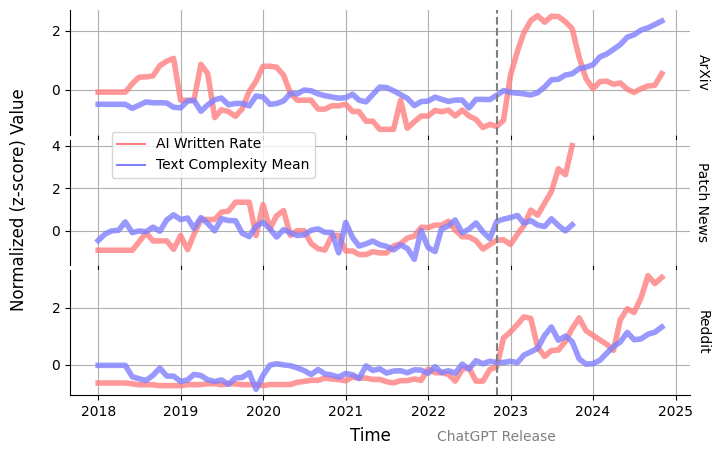

In [ ]:
from sklearn.preprocessing import StandardScaler


complexity_features_to_colors = {
    "ai_written": "#ff7f7f",  # light salmon
    "complexity": "#7f7fff",
}


feature_name_to_clean_label = {
    "ai_written": "AI Written Rate",
    "complexity": "Text Complexity Mean",
    "ChatGPT Release": "ChatGPT Release",
    "GPT-4 Release": "GPT-4 Release",
    "GPT-4o Release": "GPT-4o Release",
}

fig, axs = plt.subplots(3, 1, figsize=(8, 5), sharex=True)

for main_df, fig_title, ax in zip(
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["ArXiv", "Patch News", "Reddit"],
    axs,
):

    main_df = main_df.copy()

    normalized_values_dict = {}
    for feature in ["ai_written", *columns_about_complexity]:
        feature = f"mean_{feature}" if feature != "ai_written" else feature
        # feature_values = main_df[feature].rolling(window=5).mean().values
        feature_values = main_df[feature].values
        feature_value_for_nans_to_be_replaced = feature_values[
            ~np.isnan(feature_values)
        ][0]
        feature_values = np.where(
            np.isnan(feature_values),
            feature_value_for_nans_to_be_replaced,
            feature_values,
        )
        scaler = StandardScaler()

        normalized_values = scaler.fit_transform(
            feature_values.reshape(-1, 1)
        ).flatten()

        normalized_values_dict[feature] = normalized_values

    normalized_values_dict["complexity"] = np.mean(
        [
            normalized_values_dict["mean_voc_simpson_index"],
            normalized_values_dict["mean_voc_shannon_entropy"],
            normalized_values_dict["mean_lex_avg_dependency_link_length"],
            normalized_values_dict["mean_voc_type_token_ratio"],
            normalized_values_dict["mean_voc_hapax_legomena"],
        ],
        axis=0,
    )

    normalized_values_dict = {
        "ai_written": normalized_values_dict["ai_written"],
        "complexity": normalized_values_dict["complexity"],
    }

    for feature_name, feature_values in normalized_values_dict.items():
        ax.plot(
            main_df["date"],
            feature_values,
            label=feature_name_to_clean_label[feature_name.replace("mean_", "")],
            color=complexity_features_to_colors[
                (
                    feature_name[feature_name.find("_") + 1 :]
                    if "mean_" in feature_name
                    else feature_name
                )
            ],
            linewidth=4,
            alpha=0.8,
        )

    chatgpt_date = pd.to_datetime("2022-11-01")  # https://openai.com/index/chatgpt/

    ax.axvline(x=chatgpt_date, color="grey", linestyle="--")

    if fig_title == "Reddit":

        ax.text(
            chatgpt_date,
            -2.8,
            "ChatGPT Release",
            verticalalignment="bottom",
            horizontalalignment="center",
            color="grey",
        )

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.grid(axis="both")

    if fig_title != "Reddit":
        ax.spines["bottom"].set_visible(False)

    ax.text(
        1.02,
        0.5,
        fig_title,
        rotation=270,
        verticalalignment="center",
        horizontalalignment="center",
        transform=ax.transAxes,
    )


models_legend = []
for feature_name, color in complexity_features_to_colors.items():
    models_legend.append(
        plt.Line2D(
            [0],
            [0],
            color=color,
            label=feature_name_to_clean_label[feature_name],
            linestyle="--" if feature_name.endswith("Release") else "-",
        )
    )


fig.supylabel("Normalized (z-score) Value", x=0.05)
fig.supxlabel("Time")

fig.legend(
    handles=models_legend, loc="upper right", bbox_to_anchor=(0.44, 0.65), ncol=1
)

fig.subplots_adjust(hspace=0.04)

plt.savefig(f"all_sources_complexity_trends_mean.png", dpi=900, bbox_inches="tight")
plt.show()